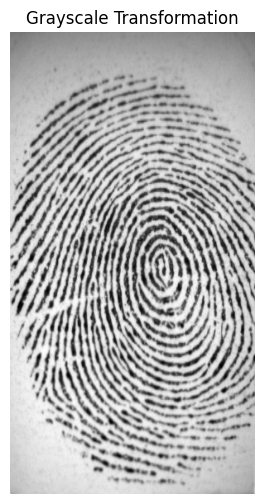

Grayscale Transformation time: 0.1057 seconds


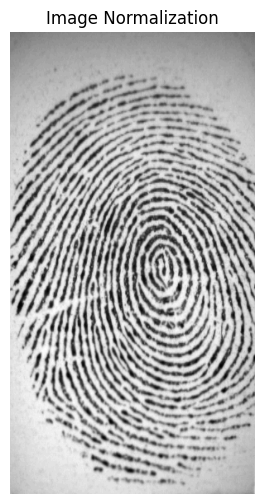

Image Normalization time: 0.3892 seconds


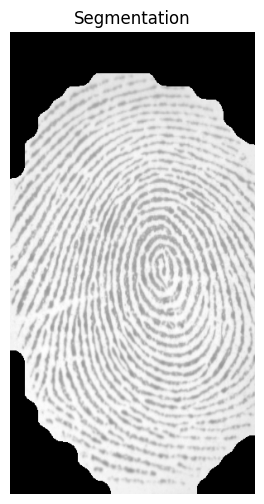

Segmentation time: 0.1333 seconds


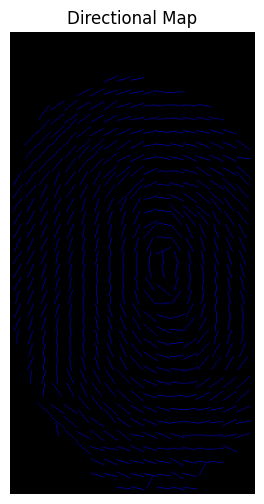

Directional Map time: 0.5836 seconds


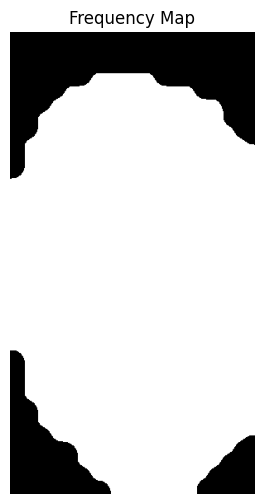

Frequency Map time: 0.2986 seconds


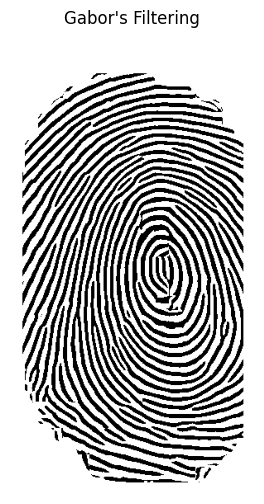

Gabor's Filtering time: 1.3712 seconds


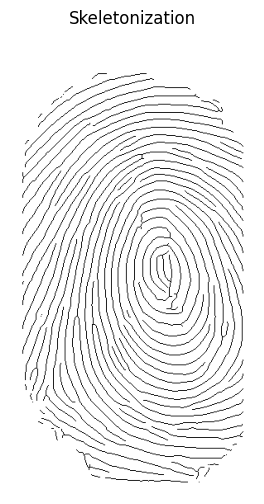

Skeletonization time: 0.0930 seconds


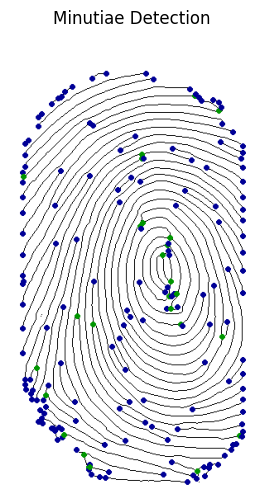

Minutiae Detection time: 0.4210 seconds


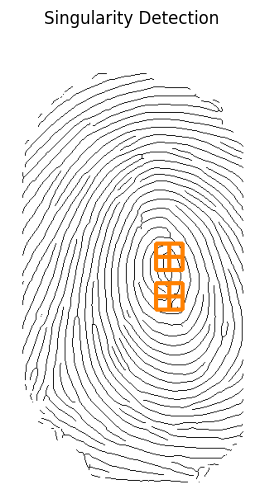

Singularity Detection time: 0.0894 seconds


array([[[ 92,  92,  92],
        [ 93,  93,  93],
        [ 93,  93,  93],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 92,  92,  92],
        [ 94,  94,  94],
        [ 94,  94,  94],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 93,  93,  93],
        [ 95,  95,  95],
        [ 95,  95,  95],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [4]:
import time
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from segmentation import create_segmented_and_variance_images
from normalization import normalize
from gabor_filter import gabor_filter
from frequency import ridge_freq
import orientation
from crossing_number import calculate_minutiaes
from skeletonize import skeletonize
from poincare import calculate_singularities

def show_image(title, img):
    """Helper function to display an image in grayscale."""
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 2:  # Grayscale image
        plt.imshow(img, cmap='gray')
    else:  # Color image
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Define pipeline function with runtime measurement
def fingerprint_processing_pipeline(input_img):
    block_size = 16

    # Step 1: Grayscale Transformation
    start_time = time.time()
    show_image("Grayscale Transformation", input_img)
    print(f"Grayscale Transformation time: {time.time() - start_time:.4f} seconds")

    # Step 2: Image Normalization
    start_time = time.time()
    normalized_img = normalize(input_img.copy(), float(100), float(100))
    show_image("Image Normalization", normalized_img)
    print(f"Image Normalization time: {time.time() - start_time:.4f} seconds")

    # Step 3: Segmentation
    start_time = time.time()
    segmented_img, normim, mask = create_segmented_and_variance_images(
        normalized_img, block_size, 0.2
    )
    show_image("Segmentation", segmented_img)
    print(f"Segmentation time: {time.time() - start_time:.4f} seconds")

    # Step 4: Directional Map (Orientation)
    start_time = time.time()
    angles = orientation.calculate_angles(normalized_img, W=block_size, smoth=False)
    orientation_img = orientation.visualize_angles(
        segmented_img, mask, angles, W=block_size
    )
    show_image("Directional Map", orientation_img)
    print(f"Directional Map time: {time.time() - start_time:.4f} seconds")

    # Step 5: Frequency Map
    start_time = time.time()
    freq = ridge_freq(
        normim,
        mask,
        angles,
        block_size,
        kernel_size=5,
        minWaveLength=5,
        maxWaveLength=15,
    )
    show_image("Frequency Map", freq)
    print(f"Frequency Map time: {time.time() - start_time:.4f} seconds")

    # Step 6: Gabor's Filtering
    start_time = time.time()
    gabor_img = gabor_filter(normim, angles, freq)
    show_image("Gabor's Filtering", gabor_img)
    print(f"Gabor's Filtering time: {time.time() - start_time:.4f} seconds")

    # Step 7: Skeletonization
    start_time = time.time()
    thin_image = skeletonize(gabor_img)
    show_image("Skeletonization", thin_image)
    print(f"Skeletonization time: {time.time() - start_time:.4f} seconds")

    # Step 8: Minutiae Detection
    start_time = time.time()
    minutias = calculate_minutiaes(thin_image)
    show_image("Minutiae Detection", minutias)
    print(f"Minutiae Detection time: {time.time() - start_time:.4f} seconds")

    # Step 9: Singularity Detection
    start_time = time.time()
    singularities_img = calculate_singularities(thin_image, angles, 1, block_size, mask)
    show_image("Singularity Detection", singularities_img)
    print(f"Singularity Detection time: {time.time() - start_time:.4f} seconds")

    # Return the final image results if needed
    output_imgs = [
        input_img,
        normalized_img,
        segmented_img,
        orientation_img,
        gabor_img,
        thin_image,
        minutias,
        singularities_img,
    ]

    for i in range(len(output_imgs)):
        if len(output_imgs[i].shape) == 2:
            output_imgs[i] = cv.cvtColor(output_imgs[i], cv.COLOR_GRAY2RGB)
    results = np.concatenate(
        [np.concatenate(output_imgs[:4], 1), np.concatenate(output_imgs[4:], 1)]
    ).astype(np.uint8)

    return results

# Load sample image
sample_img_path = r'C:\PT. MGS Bandung\Minutiae Extraction\fingerprint-minutiae-extraction-main\input\1.tif'  # Replace with your image path
input_img = cv.imread(sample_img_path, 0)  # Load image in grayscale

# Run the pipeline
fingerprint_processing_pipeline(input_img)

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Contoh array gambar (simulasi array gambar dari hasil proses sebelumnya)
# img_array = np.array([
#     [[92, 92, 92], [93, 93, 93], [93, 93, 93], [0, 0, 0]],
#     [[92, 92, 92], [94, 94, 94], [94, 94, 94], [0, 0, 0]],
#     [[93, 93, 93], [95, 95, 95], [95, 95, 95], [0, 0, 0]],
#     [[255, 255, 255], [255, 255, 255], [255, 255, 255], [255, 255, 255]]
# ], dtype=np.uint8)

# # Menampilkan array sebagai gambar
# plt.imshow(img_array)
# plt.axis('off')  # Menghilangkan sumbu
# plt.show()
